In [1]:
#Import statements
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('TSLA.csv', sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-23,50.900002,51.228001,50.270000,50.936001,50.936001,26305500
1,2019-10-24,59.674000,60.986000,57.840000,59.936001,59.936001,148604500
2,2019-10-25,59.543999,66.000000,59.222000,65.625999,65.625999,150030500
3,2019-10-28,65.508003,68.167999,64.519997,65.542000,65.542000,94351500
4,2019-10-29,63.998001,64.860001,62.950001,63.243999,63.243999,63421500


In [3]:
#Remove unused columns
#We just want the Date and Close-price
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.sample(10)

,Date,Close
489,2021-10-01,775.219971
200,2020-08-10,283.713989
311,2021-01-19,844.549988
29,2019-12-04,66.606003
220,2020-09-08,330.209991
13,2019-11-11,69.017998
429,2021-07-08,652.809998
47,2019-12-31,83.666000
276,2020-11-25,574.000000
158,2020-06-10,205.009995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    505 non-null    object 
 1   Close   505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


<AxesSubplot:xlabel='Date', ylabel='Close'>

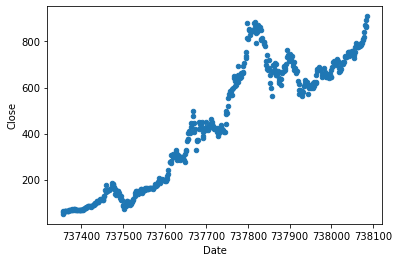

In [5]:
#Linear regression does not work with date-objects, so we need to change it to ordinal form.
#In the scatter plot, we can se a clear correlation between the date and closing price
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df.plot.scatter(x='Date', y='Close')

In [6]:
#Extract Date and Closing-price from the dataset
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])

In [7]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [8]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

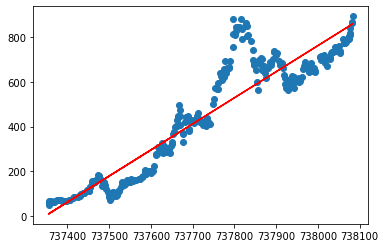

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()

In [10]:
#Show the MSE for the prediction model
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

MSE = 8951.036559970484


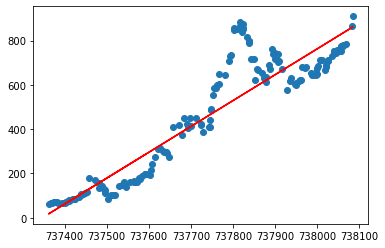

MSE = 11482.575423713537


In [11]:
#Predict on the test data instead of the training data
Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [12]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].map(dt.datetime.toordinal)
# You can now use this model to predict the outcome of the TESLA-stock on a certain day
linear_regressor.predict([[pd.to_datetime('2021-11-26').toordinal()]])

array([[902.44577797]])

In [13]:
#Lets save this model for later use
import pickle
filename = 'TSLA_stock_predictor'
pickle.dump(linear_regressor, open(filename, 'wb'))

In [14]:
#And load it again to test that it worked
loaded_tesla_model = pickle.load(open(filename, 'rb'))
loaded_tesla_model.predict([[pd.to_datetime('2021-08-26').toordinal()]])

array([[795.0171256]])